Registro de visualizaciones

In [3]:
import pandas as pd
df_train = pd.read_csv(r'C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\train.csv')

In [4]:
df_train.head(10)

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895.0,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062.0,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0
5,1,3387,STB,26062.0,2021-03-16 09:44:00.0,2021-03-16 09:47:00.0,0
6,2,3388,STB,30840.0,2021-01-01 02:22:00.0,2021-01-01 02:34:00.0,1
7,2,3388,STB,30840.0,2021-01-02 01:02:00.0,2021-01-02 01:08:00.0,1
8,2,3388,STB,13180.0,2021-01-02 01:08:00.0,2021-01-02 01:21:00.0,0
9,2,3388,STB,13180.0,2021-01-04 01:32:00.0,2021-01-04 01:35:00.0,1


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657801 entries, 0 to 3657800
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   account_id   int64  
 2   device_type  object 
 3   asset_id     float64
 4   tunein       object 
 5   tuneout      object 
 6   resume       int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 195.3+ MB


In [7]:
#Vemos si hay nulls que nos vayan a romper alguna predicción
df_train.isnull().values.any()

True

In [9]:
#Vemos dónde están y cuántos son
df_train.index[df_train.isnull().any(axis=1)]

Int64Index([ 106890,  120175,  146642,  219038,  249196,  484894,  528885,
             666823,  726181,  737730,  737731,  737732,  863794,  931142,
            1020856, 1062022, 1238162, 1321333, 1652989, 1668627, 1785644,
            1854385, 1860974, 2038544, 2038545, 2038546, 2038547, 2038548,
            2038549, 2038550, 2038551, 2200219, 2348268, 2731969, 2740223,
            2740225, 2982344, 2993856, 3025633, 3025634, 3025635, 3105229,
            3144002, 3186447, 3254238, 3254239, 3352578, 3490722, 3572923,
            3611436, 3635973],
           dtype='int64')

In [18]:
df_train.loc[3254239]

customer_id                    97749
account_id                     14892
device_type                      NaN
asset_id                     30357.0
tunein         2021-01-16 14:57:00.0
tuneout        2021-01-16 15:03:00.0
resume                             0
Name: 3254239, dtype: object

In [19]:
#Como los nulos están siempre en el asset y no me sirve un registro sin asset, los elimino
df_train.dropna(inplace=True)
df_train.isnull().values.any()

False

In [22]:
#Como asset es un id, voy a llevarlo a tipo entero
df_train['asset_id'] = df_train['asset_id'].astype('int32')

<AxesSubplot:xlabel='asset_id', ylabel='count'>

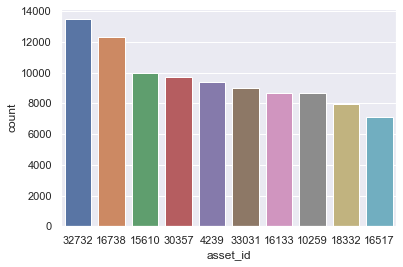

In [26]:
#Vemos los 10 ítems más vistos
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.countplot(x='asset_id', data=df_train,
             order=df_train.asset_id.value_counts().iloc[:10].index)